In [1]:
# imports
from utils import *
from models import *

Training data shape:  (307511, 122)
Testing data shape:  (48744, 121)
ONE HOT ENCODED
Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)
ALIGNED:
Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)
There were 9274 anomalies in the test data out of 48744 entries
Training Features shape:  (307511, 232)
Testing Features shape:  (48744, 240)
Training Features shape:  (307511, 232)
Testing Features shape:  (48744, 231)


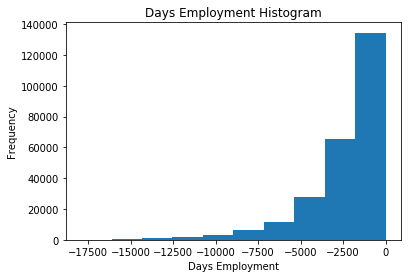

In [2]:
# do basic pre-processing
def pre_process():
    # read data
    train_data = load_training_data()
    test_data = load_test_data()
    train_data, test_data = encode_binary_cols(train_data, test_data)
    train_data, test_data = one_hot_encode(train_data, test_data)
    train_data, test_data, train_Y = align_data(train_data, test_data)
    train_data, test_data = remove_days_employed_anomaly(train_data, test_data)
    train_data, test_data = remove_missing_cols(train_data, test_data)
    
    train_data = mean_impute(train_data)
    test_data = mean_impute(test_data)

    return train_data, test_data

train_data, test_data = pre_process()

In [3]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 

def over_sample_SMOTE(X: pd.DataFrame, y: pd.DataFrame):
    # training set only. Takes in as dataframe, and returns as np array
    # only apply once all other pre-processing is done, but before normalisation

    sm = SMOTE()
    X, y = sm.fit_sample(X, y)
    return X,y

def over_sample_ADASYN(X: pd.DataFrame, y: pd.DataFrame):
    # training set only. Takes in as dataframe, and returns as np array
    # only apply once all other pre-processing is done, but before normalisation
    sm = ADASYN()
    X, y = sm.fit_sample(X, y)
    return(X,y)

In [4]:
train_X, test_X , train_Y= align_data(train_data, test_data)
train_X = train_X.drop(columns=['TARGET'])
train_X = train_X.drop(columns=['SK_ID_CURR'])
test_X = test_X.drop(columns=['SK_ID_CURR'])
print('Training Data Shape: ', train_X.shape); print('Testing Data Shape: ', test_X.shape)
feature_names = train_X.columns
train_X, train_Y = over_sample_ADASYN(train_X, train_Y)
train_X, test_X = normalise(train_X, test_X)

ALIGNED:
Training Features shape:  (307511, 232)
Testing Features shape:  (48744, 231)
Training Data Shape:  (307511, 230)
Testing Data Shape:  (48744, 230)
NORMALISED:
Training data shape:  (567341, 230)
Testing data shape:  (48744, 230)


In [5]:
def baseline_log_reg(train, train_Y, test, save_path):
    # Make the model with the specified regularization parameter
    model = LogisticRegression(C=0.1)

    # Train on the training data
    model.fit(train, train_Y)

    # Make predictions - only require 2nd columns (representing the probability that the target is 1)
    predictions = model.predict_proba(test)[:, 1]

    if save_path is not None:
        # Save model
        save_pickle(save_path, model)  # save model
        print("Log reg baseline model saved to: ", save_path)

    return model, predictions

Run 0 AUC socre: 0.764976461563245
Run 1 AUC socre: 0.7639137941361445
Run 2 AUC socre: 0.7649345780691115
Run 3 AUC socre: 0.7671141743087142
Run 4 AUC socre: 0.7665019388118048
Run 5 AUC socre: 0.7613137371409889
Avg ROC AUC score: 0.7647924473383347


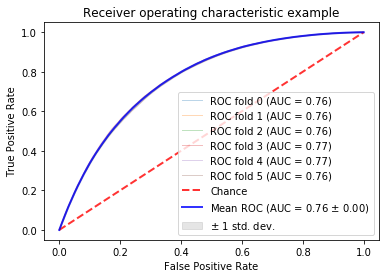

In [6]:
model, predictions = baseline_log_reg(train_X, train_Y, test_X, save_path=None) # don't save model
cross_val_roc_curve(train_X, train_Y, model)